/Users/wgblumbe/miniconda3/envs/Spring24/lib/python3.10/site-packages/pyrtlib/tb_spectrum.py:219: UserWarning: It seems that TbCloudRTE.cloudy attribute is not set to True. Sets it to True for running model in cloudy condition.
  warnings.warn("It seems that TbCloudRTE.cloudy attribute is not set to True. "


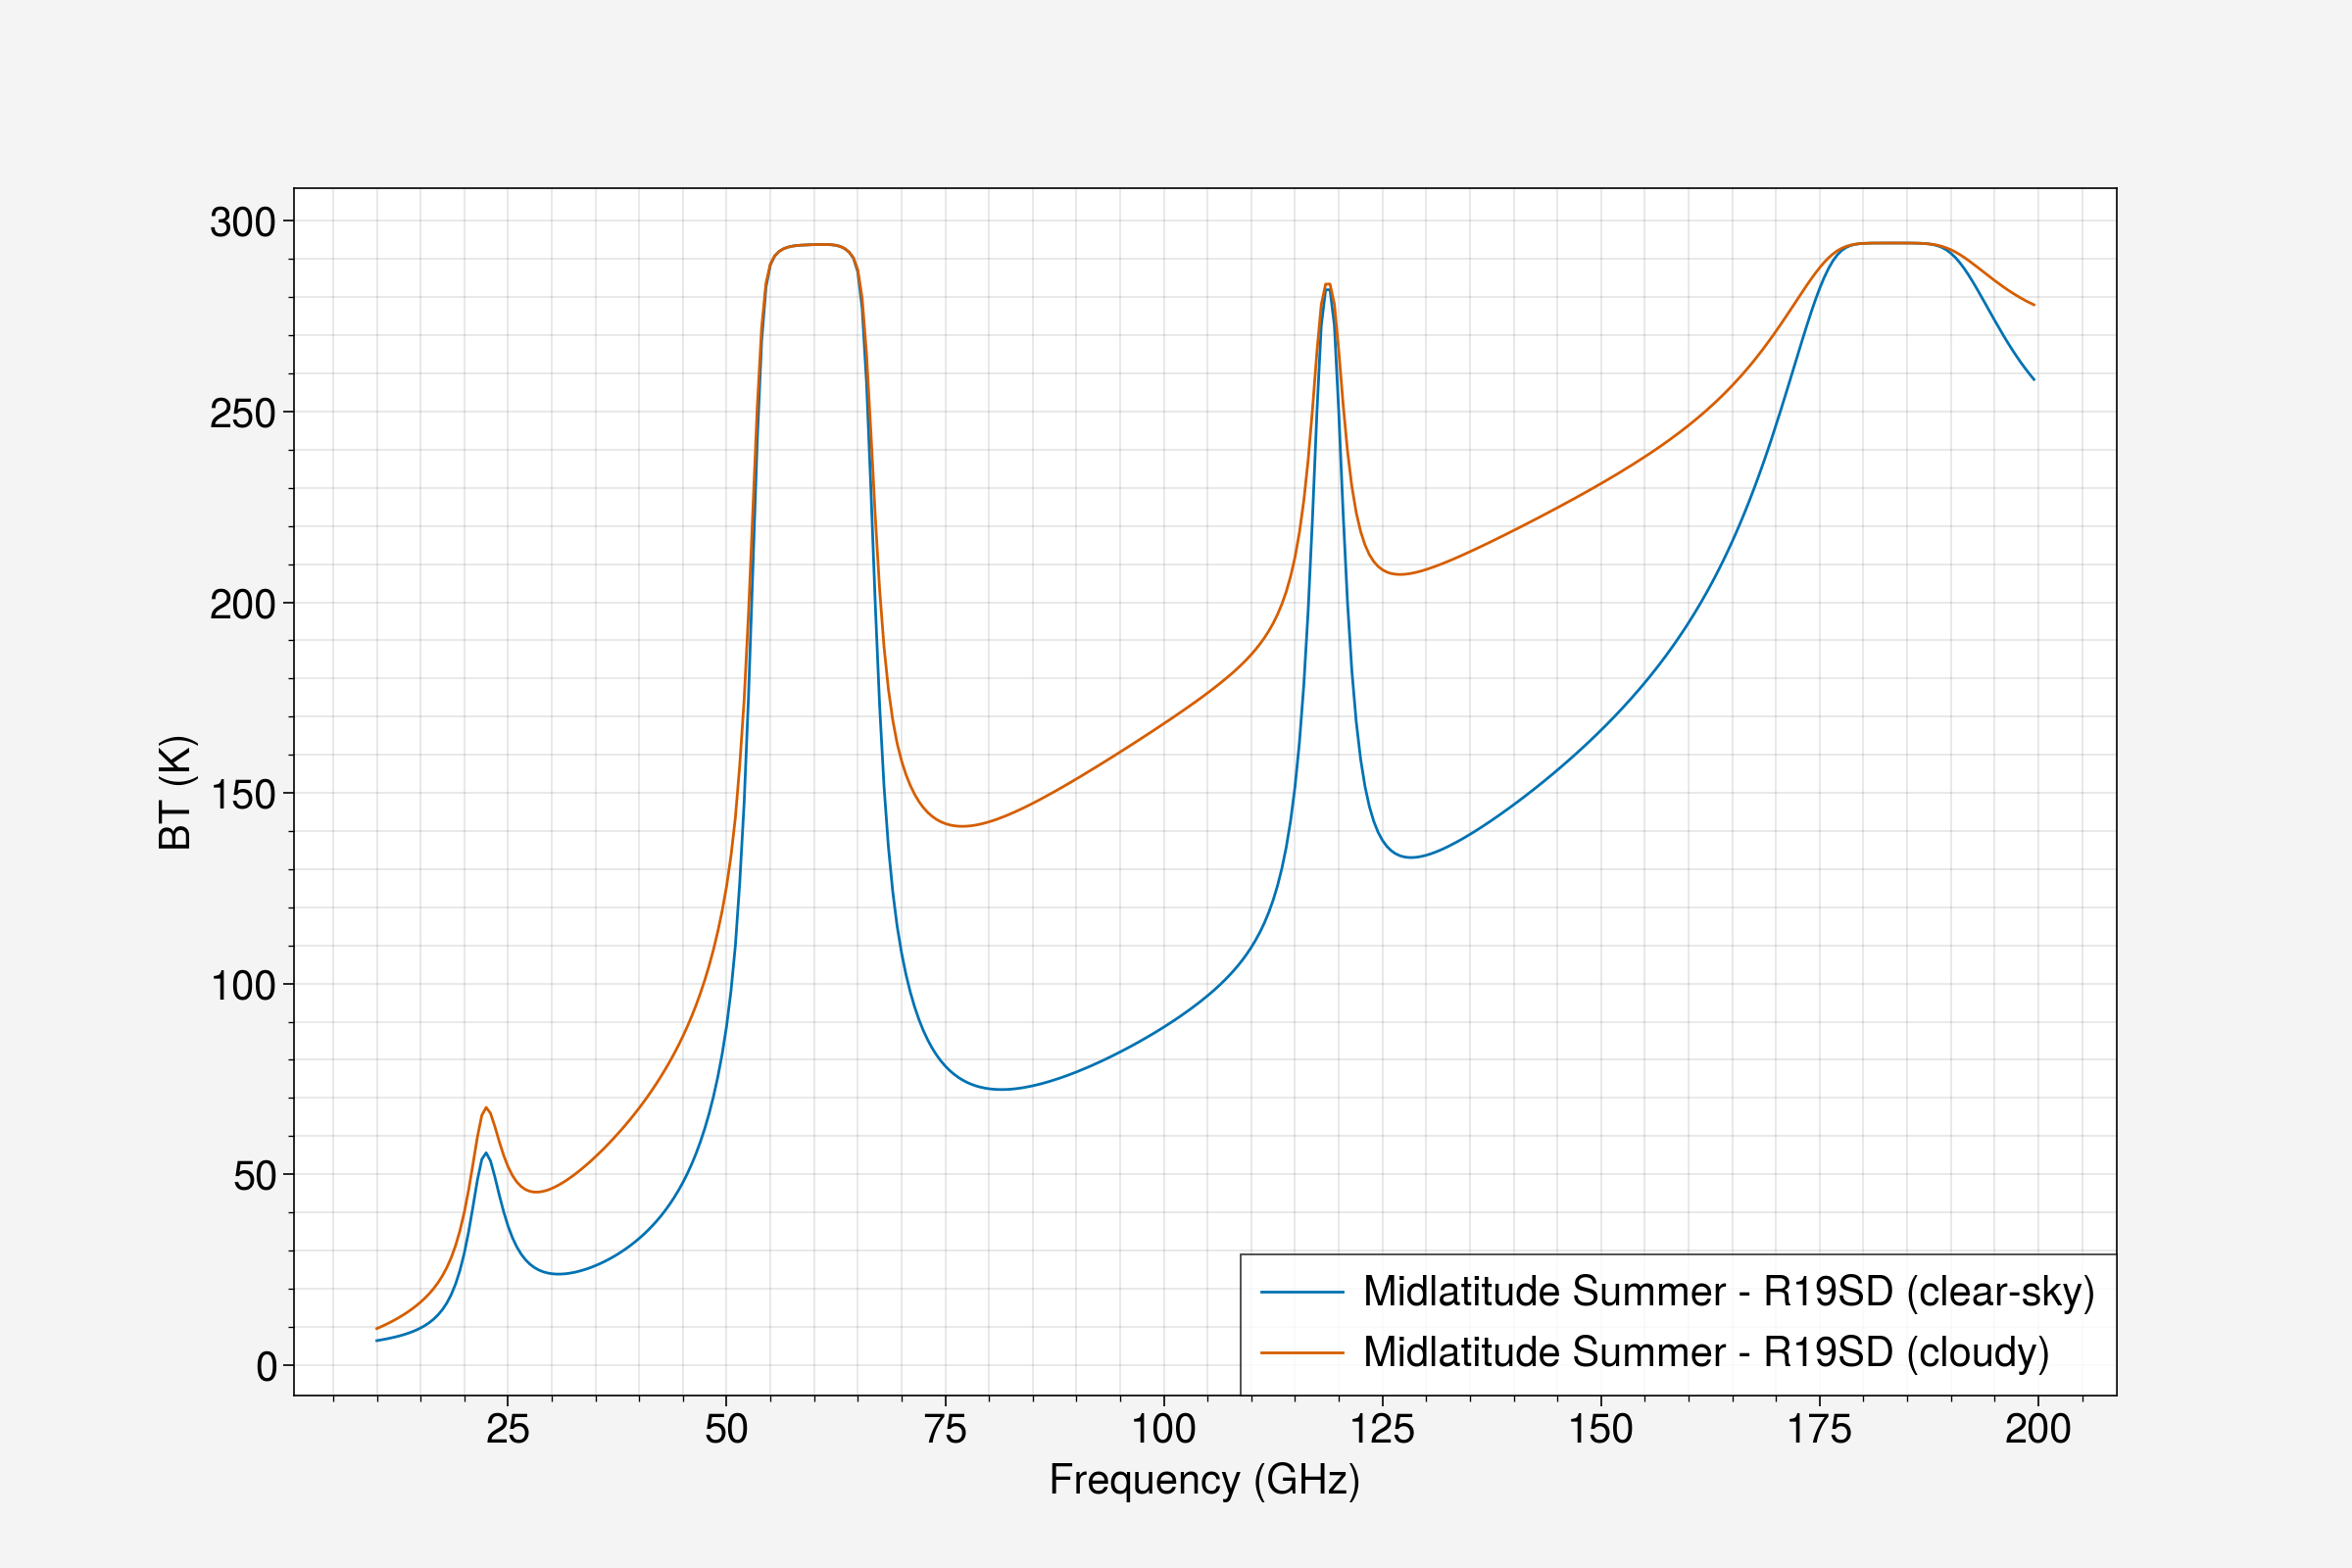

In [55]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FormatStrFormatter
plt.rcParams.update({'font.size': 15})
import numpy as np
np.seterr('raise')

from pyrtlib.climatology import AtmosphericProfiles as atmp
from pyrtlib.tb_spectrum import TbCloudRTE
from pyrtlib.rt_equation import RTEquation

from pyrtlib.utils import ppmv2gkg, mr2rh

atm = ['Tropical',
       'Midlatitude Summer',
       'Midlatitude Winter',
       'Subarctic Summer',
       'Subarctic Winter',
       'U.S. Standard']

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

z, p, d, t, md = atmp.gl_atm(atmp.MIDLATITUDE_SUMMER)
gkg = ppmv2gkg(md[:, atmp.H2O], atmp.H2O)
rh = mr2rh(p, t, gkg)[0] / 100

mdl = 'R19SD'

ang = np.array([90.])
frq = np.arange(10, 200, .5)
nf = len(frq)

denliq = np.zeros(z.shape)
denice = np.zeros(z.shape)
cldh = np.empty((2, 2))

for i in [False, True]:
    if not i:
        text_plot = 'clear-sky'
    else:
        # build a cloud
        ib = 4
        it = 6
        denliq[ib:it] = 0.5 * np.ones((it - ib)) # g/m3
        cldh[:, 0] = np.array([z[ib], z[it]])
        ib = 4
        it = 6
        denice[ib:it] = 0.5 * np.ones((it - ib)) # g/m3
        cldh[:, 1] = np.array([z[ib], z[it]])
        text_plot = 'cloudy'

    ax.set_xlabel('Frequency (GHz)')
    ax.set_ylabel('BT (K)')

    rte = TbCloudRTE(z, p, t, rh, frq, ang)
    rte.satellite = False
    rte.cloudy = i
    rte.init_cloudy(cldh, denice, denliq)
    rte.init_absmdl(mdl)
    df, other = rte.execute(only_bt=False)

    df = df.set_index(frq)
    df.tbtotal.plot(x=frq, ax=ax, linewidth=1,
                    label='{} - {} ({})'.format(atm[atmp.MIDLATITUDE_SUMMER], mdl, text_plot))

ax.grid(True, 'both')
ax.legend()
plt.show()

lwp_calc = np.trapz(denliq, x=z*1000)
iwp_calc = np.trapz(denice, x=z*1000)

[[0.1]] [[0.1]]
1000.0 1000.0
1000.0 1000.0
[0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


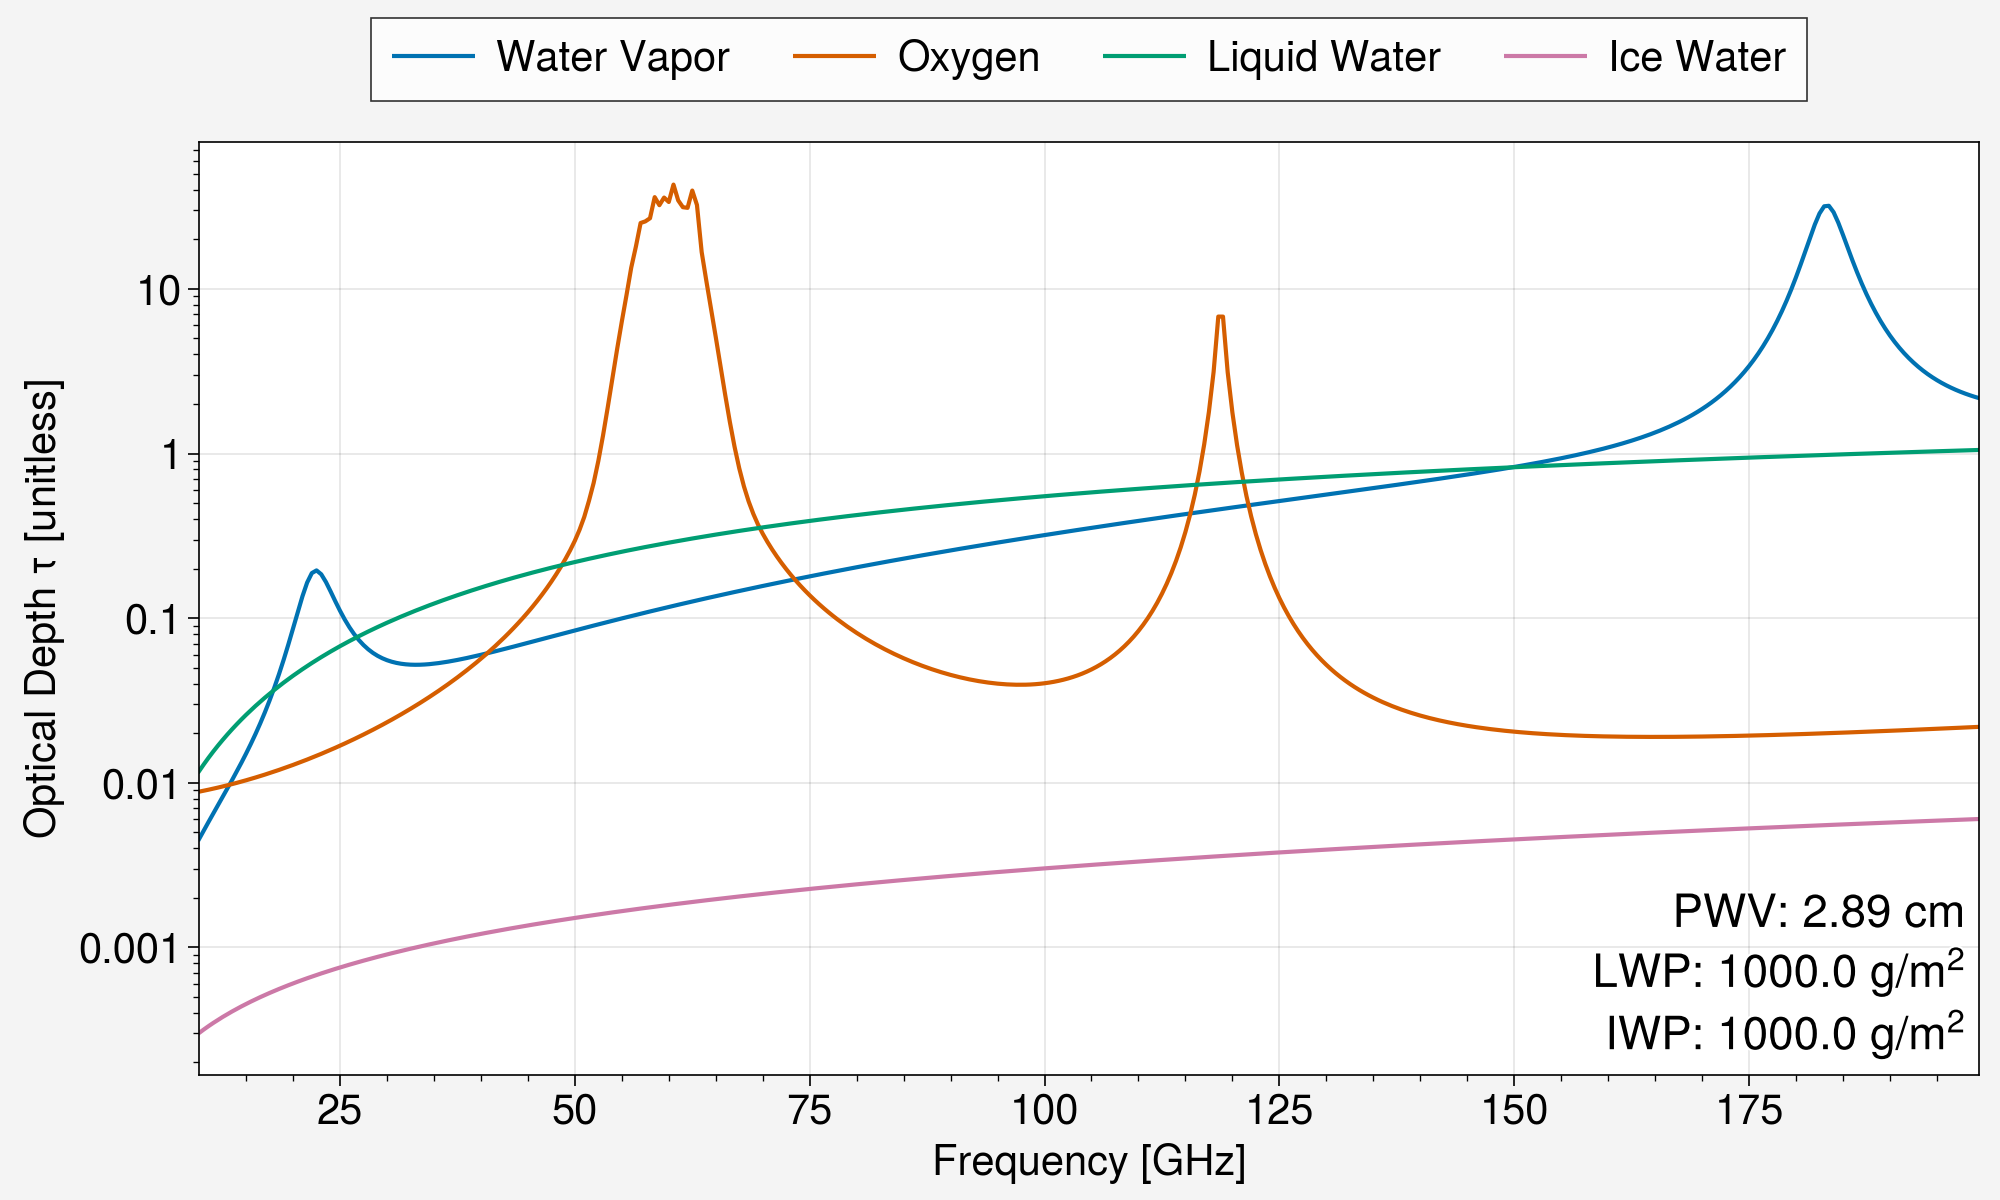

In [70]:
print(rte.sice, rte.sliq)
sice = (rte.sice * 10000).squeeze() # cm to g/cm2 to g/m2
sliq = (rte.sliq * 10000).squeeze() # cm to g/cm2 to g/m2

print(lwp_calc, iwp_calc)
print(sice, sliq)

print(denice)
import proplot as pplt
fig, axs = pplt.subplots(ncols=1, nrows=1, figsize=(10,6), yscale='log', 
                         ylabel=r"Optical Depth $\tau$ [unitless]",
                         xlabel='Frequency [GHz]')
axs.plot(df.index, df['tauwet'], label="Water Vapor")
axs.plot(df.index, df['taudry'], label="Oxygen")
axs.plot(df.index, df['tauliq'], label="Liquid Water")
axs.plot(df.index, df['tauice'], label="Ice Water")
#axs.plot(df.index, df['tauwet']+df['taudry']+df['tauliq']+df['tauice'], label="Total", color='k')
axs.format(lrtitle=f"PWV: {rte.srho.squeeze():.3} cm\nLWP: {sliq:.1f} $g/m^{2}$\nIWP: {sice:.1f} $g/m^{2}$")
fig.legend(loc='t',ncols=5)
fig.save("midlatitude_microwave_liquid.pdf")
pplt.show()

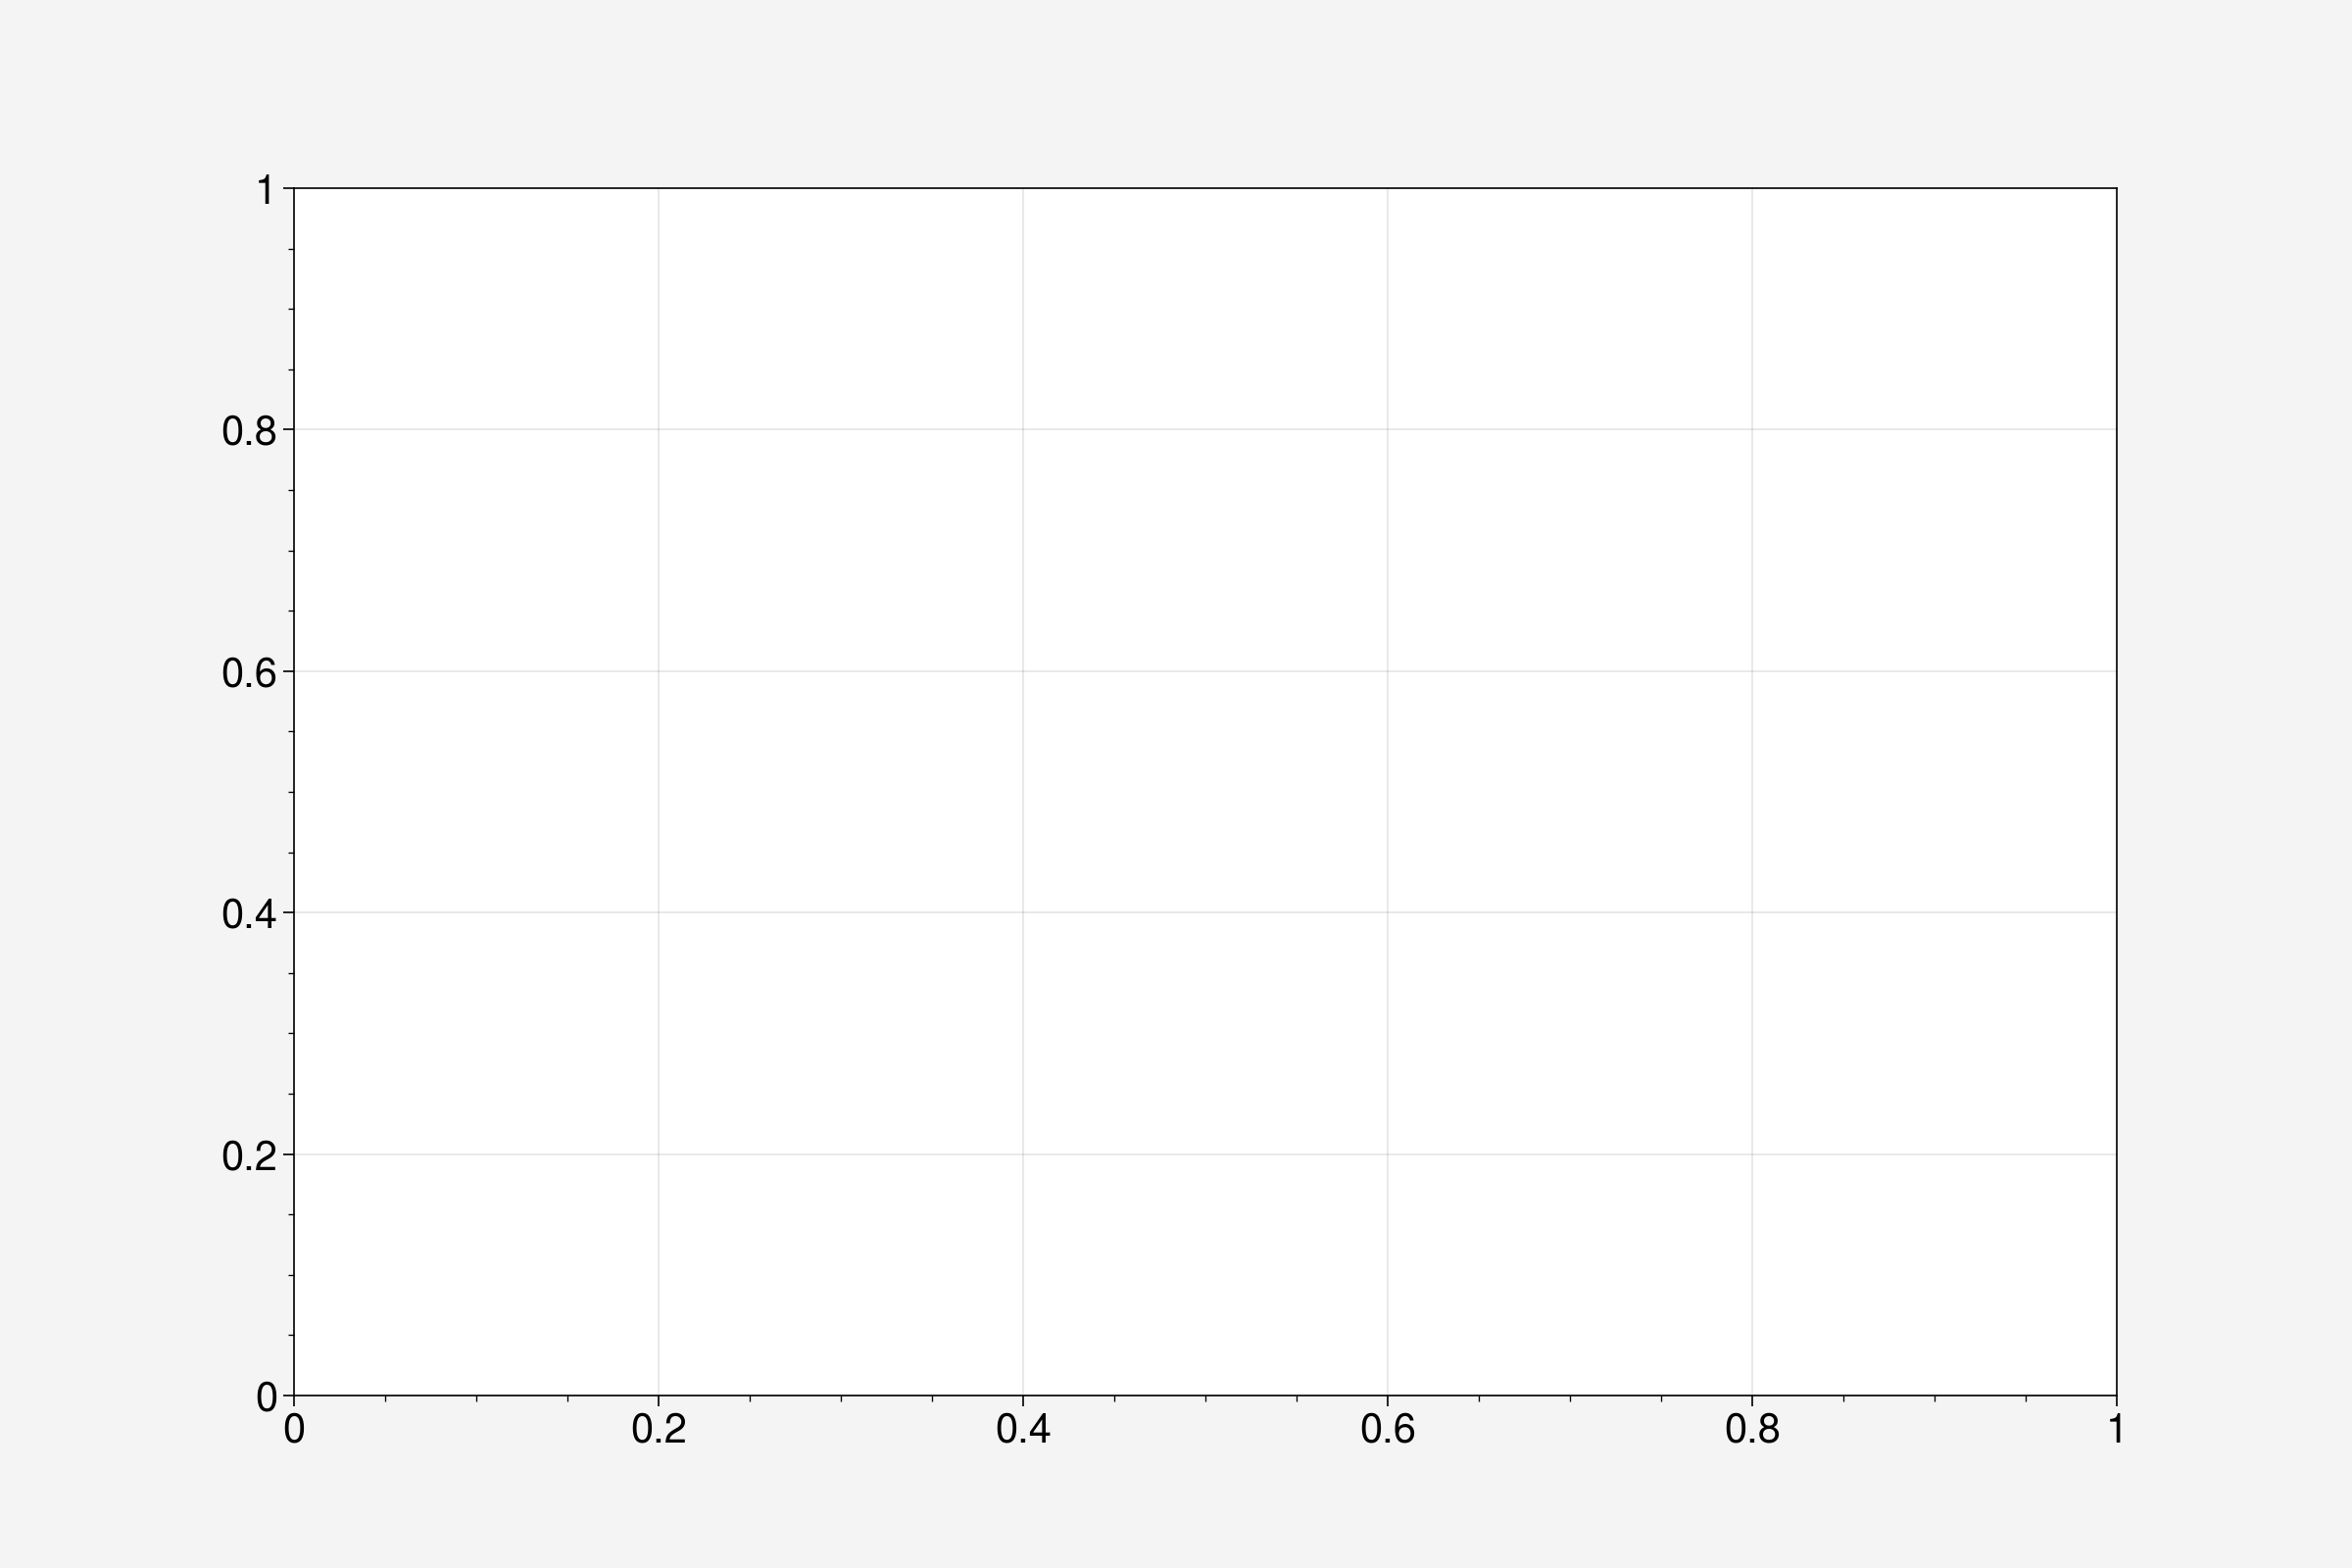

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FormatStrFormatter
plt.rcParams.update({'font.size': 15})
import numpy as np
np.seterr('raise')

from pyrtlib.climatology import AtmosphericProfiles as atmp
from pyrtlib.tb_spectrum import TbCloudRTE
from pyrtlib.rt_equation import RTEquation

from pyrtlib.utils import ppmv2gkg, mr2rh

atm = ['Tropical',
       'Midlatitude Summer',
       'Midlatitude Winter',
       'Subarctic Summer',
       'Subarctic Winter',
       'U.S. Standard']

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

z, p, d, t, md = atmp.gl_atm(atmp.MIDLATITUDE_WINTER)
gkg = ppmv2gkg(md[:, atmp.H2O], atmp.H2O)
rh = mr2rh(p, t, gkg)[0] / 100

mdl = 'R19SD'

ang = np.array([90.])
frq = np.arange(10, 200, .5)
nf = len(frq)

denliq = np.zeros(z.shape)
denice = np.zeros(z.shape)
cldh = np.empty((2, 2))


# build a cloud
ib = 1
it = 3
denliq[ib:it + 1] = 0.0005 * np.ones((it - ib + 1))
cldh[:, 0] = np.array([z[ib], z[it]])
ib = 29
it = 31
denice[ib:it + 1] = 0 * np.ones((it - ib + 1))
cldh[:, 1] = np.array([z[ib], z[it]])

rte = TbCloudRTE(z, p, t, rh, frq, ang)
rte.satellite = False
rte.cloudy = False
#rte.init_cloudy(cldh, denice, denliq)
rte.init_absmdl(mdl)
df_clear = rte.execute()
pwv_clear = rte.srho.squeeze()
lwp_clear = rte.srho.squeeze()

rte = TbCloudRTE(z, p, t, rh, frq, ang)
rte.satellite = False
rte.cloudy = True
rte.init_cloudy(cldh, denice, denliq)
rte.init_absmdl(mdl)
df_cloudy = rte.execute()
pwv_cloudy = rte.srho.squeeze()
lwp_cloudy = rte.sliq.squeeze()

rh = mr2rh(p, t, gkg + 0.0001)[0] / 100
rte = TbCloudRTE(z, p, t, rh, frq, ang)
rte.satellite = False
rte.cloudy = False
#rte.init_cloudy(cldh, denice, denliq)
rte.init_absmdl(mdl)
df_pwv_pert = rte.execute()
pwv_pert = rte.srho.squeeze()

In [52]:
sice = (rte.sice * 1/0.0001).squeeze() # cm to g/cm2 to g/m2
sliq = (rte.sliq * 1/0.0001).squeeze() # cm to g/cm2 to g/m2

#pwv_pert = pwv_pert * 10/0.0001
#pwv_clear = pwv_clear * 10/0.0001
print(sice, sliq)#


1000.0 1000.0


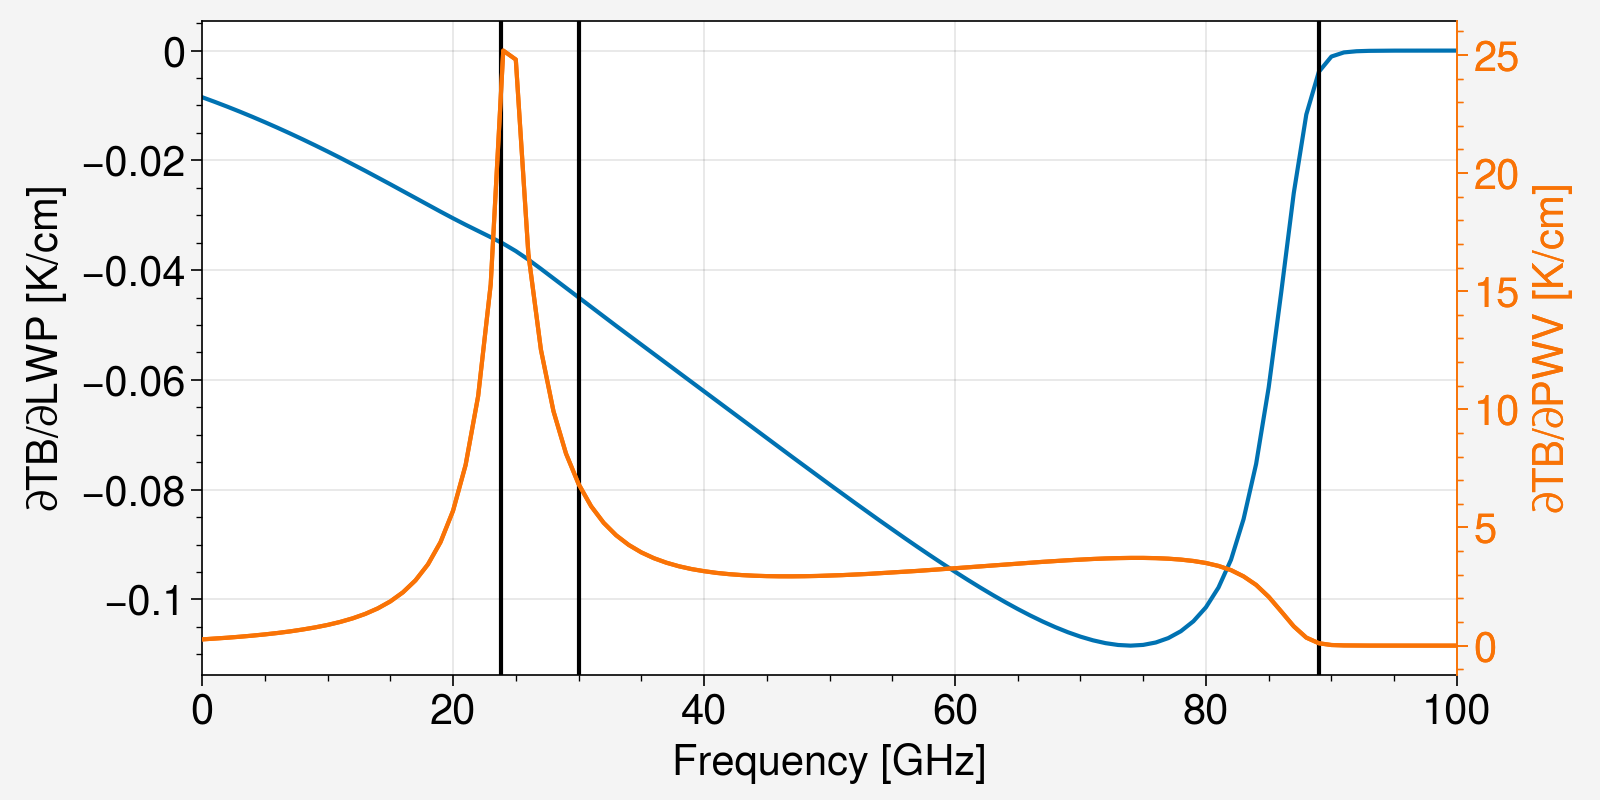

In [6]:
import proplot as pplt
#1000 g/m^2 of water will have a height of 0.1cm.

fig, axs = pplt.subplots(ncols=1, nrows=1, figsize=(8,4), xlim=(0,100))
axs.plot( df_cloudy.index, (df_cloudy.tbtotal - df_clear.tbtotal)/(lwp_cloudy - lwp_clear), label="")
axs.format(ylabel=r"$\partial TB /\partial LWP$ [$K/cm$]", xlabel='Frequency [GHz]')
ax2 = axs.twinx()

ax2.plot( df_cloudy.index, (df_pwv_pert.tbtotal - df_clear.tbtotal)/(pwv_pert - pwv_clear), label="", color='orange')
ax2.format(ylabel=r"$\partial TB /\partial PWV$ [$K/cm$]", xlabel='Frequency [GHz]', color='orange')

#axs.format(lrtitle=f"PWV: {rte.srho.squeeze():.3} cm\nLWP: {sliq:.1f} $g/m^{2}$\nIWP: {sice:.1f} $g/m^{2}$")
#fig.legend(loc='t',ncols=5)
axs.axvline(x=23.834, color='k')
axs.axvline(x=30, color='k')
axs.axvline(x=89, color='k')
fig.save("jacobian_microwave_lwp.pdf")
pplt.show()

In [129]:
print(pwv_clear)

2.8895293438126792


In [16]:
pwv_pert,pwv_clear

(84928.767094258, 84928.68240700458)

In [53]:
np.trapz(denliq, x=z*1000), np.trapz(denice, x=z*1000)

(1000.0, 1000.0)

In [54]:
t[4:6]

array([273.2, 267.2])

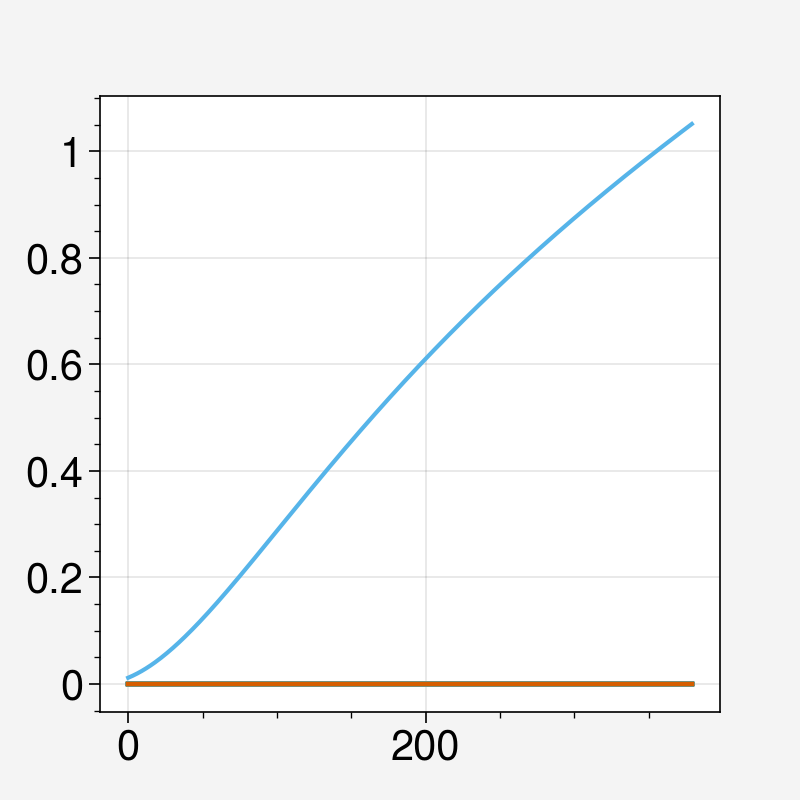

In [64]:
plt.plot(other['taulayliq'].squeeze())
#plt.colorbar()

In [60]:
other['taulayliq'].shape

(380, 1, 50)

In [65]:
other

{'taulaywet': array([[[0.00000000e+00, 2.09185453e-03, 1.19406421e-03, ...,
          7.97074018e-22, 1.40521899e-22, 2.87244767e-23]],
 
        [[0.00000000e+00, 2.35665672e-03, 1.34647855e-03, ...,
          9.02006675e-22, 1.59538512e-22, 3.26778394e-23]],
 
        [[0.00000000e+00, 2.64925180e-03, 1.51526172e-03, ...,
          1.01917560e-21, 1.80896235e-22, 3.71332641e-23]],
 
        ...,
 
        [[0.00000000e+00, 1.02069957e+00, 5.91359642e-01, ...,
          4.33155628e-19, 6.85697747e-20, 1.27970962e-20]],
 
        [[0.00000000e+00, 1.00025727e+00, 5.78864428e-01, ...,
          4.21782689e-19, 6.68169901e-20, 1.24833227e-20]],
 
        [[0.00000000e+00, 9.81809543e-01, 5.67590890e-01, ...,
          4.11533943e-19, 6.52381051e-20, 1.22008872e-20]]]),
 'taulaydry': array([[[0.00000000e+00, 1.58072741e-03, 1.31292086e-03, ...,
          4.42232539e-17, 8.83210859e-18, 2.14829510e-18]],
 
        [[0.00000000e+00, 1.60197070e-03, 1.33052989e-03, ...,
          4.48121552e

In [69]:
other['taulayliq'].squeeze()[:,4:7]

array([[0.        , 0.01175677, 0.        ],
       [0.        , 0.0129357 , 0.        ],
       [0.        , 0.01416734, 0.        ],
       ...,
       [0.        , 1.04697988, 0.        ],
       [0.        , 1.04909045, 0.        ],
       [0.        , 1.05119813, 0.        ]])